In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv('data.csv')

In [3]:
# Split data into training and test sets
train_df = df.iloc[:-500]
test_df = df.iloc[-500:]

X_train = train_df[['CTRL_mean', 'CTRL against_mean']]
y_train = train_df['OUTCOME']
X_test = test_df[['CTRL_mean', 'CTRL against_mean']]
y_test = test_df['OUTCOME']

In [4]:
# Initialise models and their hyperparameters with adjusted solvers and kernels
models = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "params": {
            "C": [0.1, 1],
            "solver": ["saga"]  # Using saga which can handle non-linear relationships
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [None, 10],
            "min_samples_split": [2, 5]
        }
    },
    "Support Vector Machine": {
        "model": SVC(probability=True),
        "params": {
            "C": [0.1, 1],
            "kernel": ["rbf", "poly"]  # Using non-linear kernels
        }
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5],
            "weights": ["uniform"]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 5]
        }
    },
    "Naive Bayes": {
        "model": GaussianNB(),
        "params": {}
    }
}

In [5]:
# Train and evaluate each model
results = []
for model_name, mp in models.items():
    model = mp["model"]
    params = mp["params"]
    
    best_model = model
    if params:
        # Manually set hyperparameters
        best_params = {k: v[0] for k, v in params.items()}
        best_model.set_params(**best_params)
        
    best_model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = best_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results.append((model_name, accuracy, best_model))
    
    # Save the model
    joblib.dump(best_model, f"{model_name}_model.pkl")

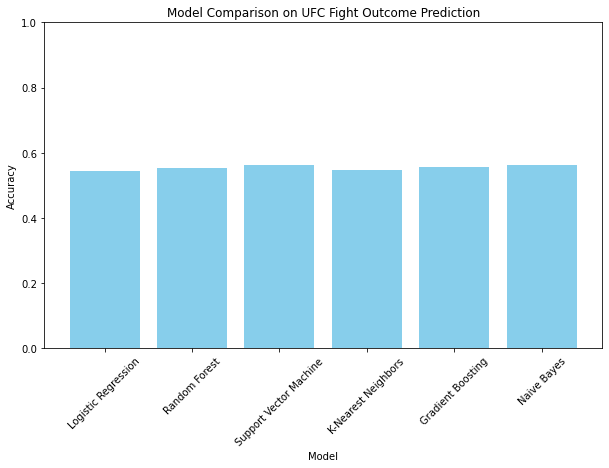

                    Model  Accuracy
0     Logistic Regression     0.544
1           Random Forest     0.552
2  Support Vector Machine     0.562
3     K-Nearest Neighbors     0.548
4       Gradient Boosting     0.556
5             Naive Bayes     0.564


In [6]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Best Model'])

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison on UFC Fight Outcome Prediction')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Display results table
print(results_df[['Model', 'Accuracy']])